In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
train_path = '/content/drive/MyDrive/dataset/train'
test_path = '/content/drive/MyDrive/dataset/test'
valid_path = '/content/drive/MyDrive/dataset/val'
batch_size = 16
img_width = 500

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


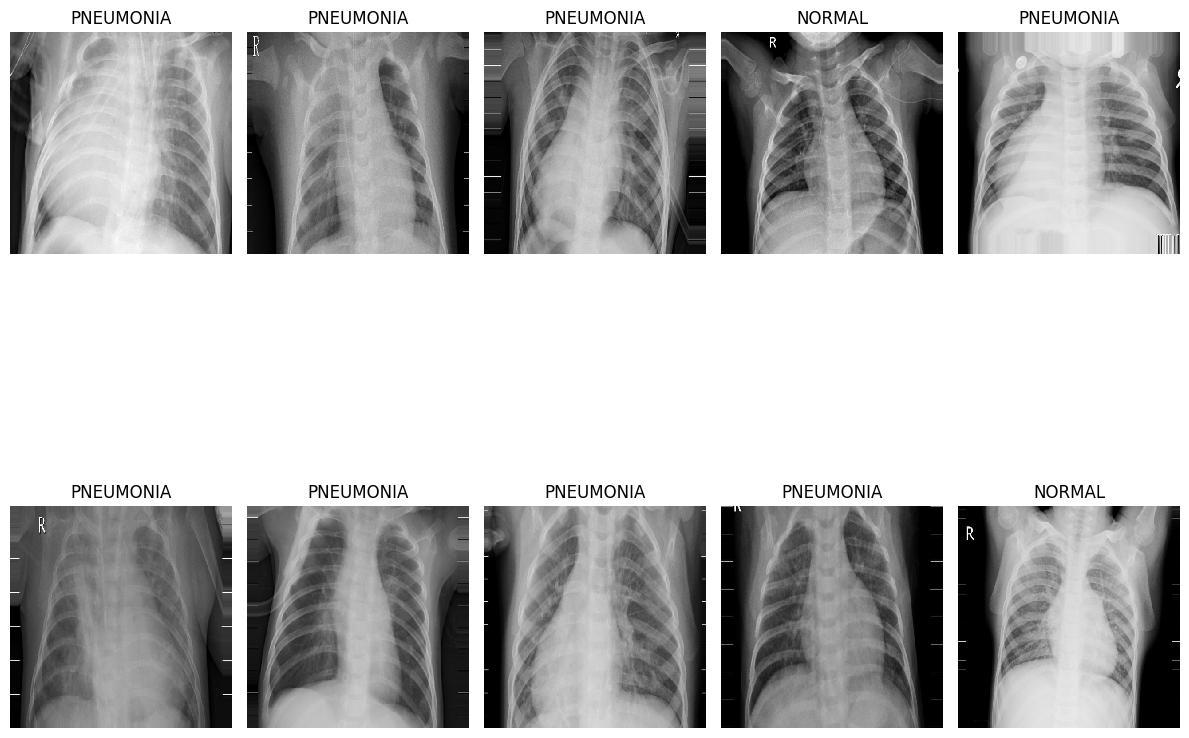

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
image_gen = ImageDataGenerator(
                              rescale = 1./255,
                              shear_range = 0.2,
                              zoom_range = 0.2,
                              horizontal_flip = True,
                              )
test_data_gen = ImageDataGenerator (rescale = 1./255)
img_height=500
train = image_gen.flow_from_directory( train_path, target_size=(img_height, img_width), color_mode='grayscale', class_mode='binary', batch_size=batch_size)
test = test_data_gen.flow_from_directory( test_path, target_size=(img_height, img_width), color_mode='grayscale', shuffle=False, class_mode='binary', batch_size=batch_size )
valid = test_data_gen.flow_from_directory( valid_path, target_size=(img_height, img_width), color_mode='grayscale', class_mode='binary', batch_size=batch_size )

plt.figure(figsize=(12, 12))
for i in range(0, 10):
  plt.subplot(2, 5, i+1)
  for X_batch, Y_batch in train:
    image = X_batch[0]
    dic = {0: 'NORMAL', 1: 'PNEUMONIA'}
    plt.title(dic.get(Y_batch[0]))
    plt.axis('off')
    plt.imshow(np.squeeze (image),cmap='gray', interpolation='nearest')
    break
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
cnn=Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D (32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D (64, (3, 3), activation="relu", input_shape=(img_width, img_height, 1)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense (activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()
Conv2D(3,3,strides=(1,1),padding="valid",activation=None,input_shape=(500,500,1))
MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 498, 498, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 249, 249, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 247, 247, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 123, 123, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 121, 121, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 58, 58, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 27, 27, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,467,137 (5.60 MB)

 Trainable params: 1,467,137 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

<MaxPooling2D name=max_pooling2d_5, built=False>

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model (cnn, show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)
early = EarlyStopping(monitor="val_loss", mode="min", patience=3)
learning_rate_reduction = ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose=1, factor=0.3, min_lr=0.000001)
callbacks_list = [ early, learning_rate_reduction]

In [ ]:
cw={0: 1.9371534195933457, 1: 0.6739549839228296}

In [9]:
cnn.fit(train, epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)
test_accu= cnn.evaluate(test)
print('The testing accuracy is:',test_accu[1]*100,'%')

Epoch 1/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step - accuracy: 0.7814 - loss: 0.4638 - val_accuracy: 0.6250 - val_loss: 1.3107 - learning_rate: 0.0010
Epoch 2/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 146s 440ms/step - accuracy: 0.9066 - loss: 0.2339 - val_accuracy: 0.6250 - val_loss: 0.9782 - learning_rate: 0.0010
Epoch 3/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 147s 444ms/step - accuracy: 0.9290 - loss: 0.1989 - val_accuracy: 0.7500 - val_loss: 0.4578 - learning_rate: 0.0010
Epoch 4/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 199s 436ms/step - accuracy: 0.9319 - loss: 0.1750 - val_accuracy: 0.6250 - val_loss: 0.6510 - learning_rate: 0.0010
Epoch 5/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.9361 - loss: 0.1597
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
326/326 ━━━━━━━━━━━━━━━━━━━━ 202s 436ms/step - accuracy: 0.9361 - loss: 0.1598 - val_accuracy: 0.7500 - val_loss: 0.4886 - learning_rate: 0.0010
Epoch 6/25
326/326 ━━━━━━━━━━━━━━━━━━━━ 203s 438ms/step - accuracy: 0.

In [10]:
preds = cnn.predict(test, verbose=1)

39/39 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step


In [11]:
predictions = preds.copy()
predictions [predictions <= 0.5] = 0
predictions [predictions > 0.5] = 1

              precision    recall  f1-score   support

      NORMAL       0.94      0.80      0.87       234
   PNEUMONIA       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



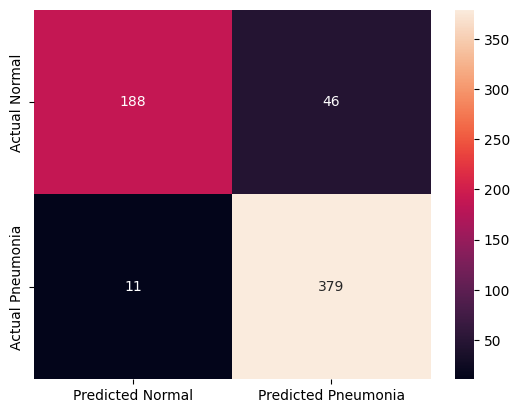

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]), index=["Actual Normal", "Actual Pneumonia"],
columns=["Predicted Normal", "Predicted Pneumonia"])
import seaborn as sns
sns.heatmap(cm,annot=True, fmt="d")
print(classification_report(y_true=test.classes,y_pred=predictions, target_names = ['NORMAL', 'PNEUMONIA']))

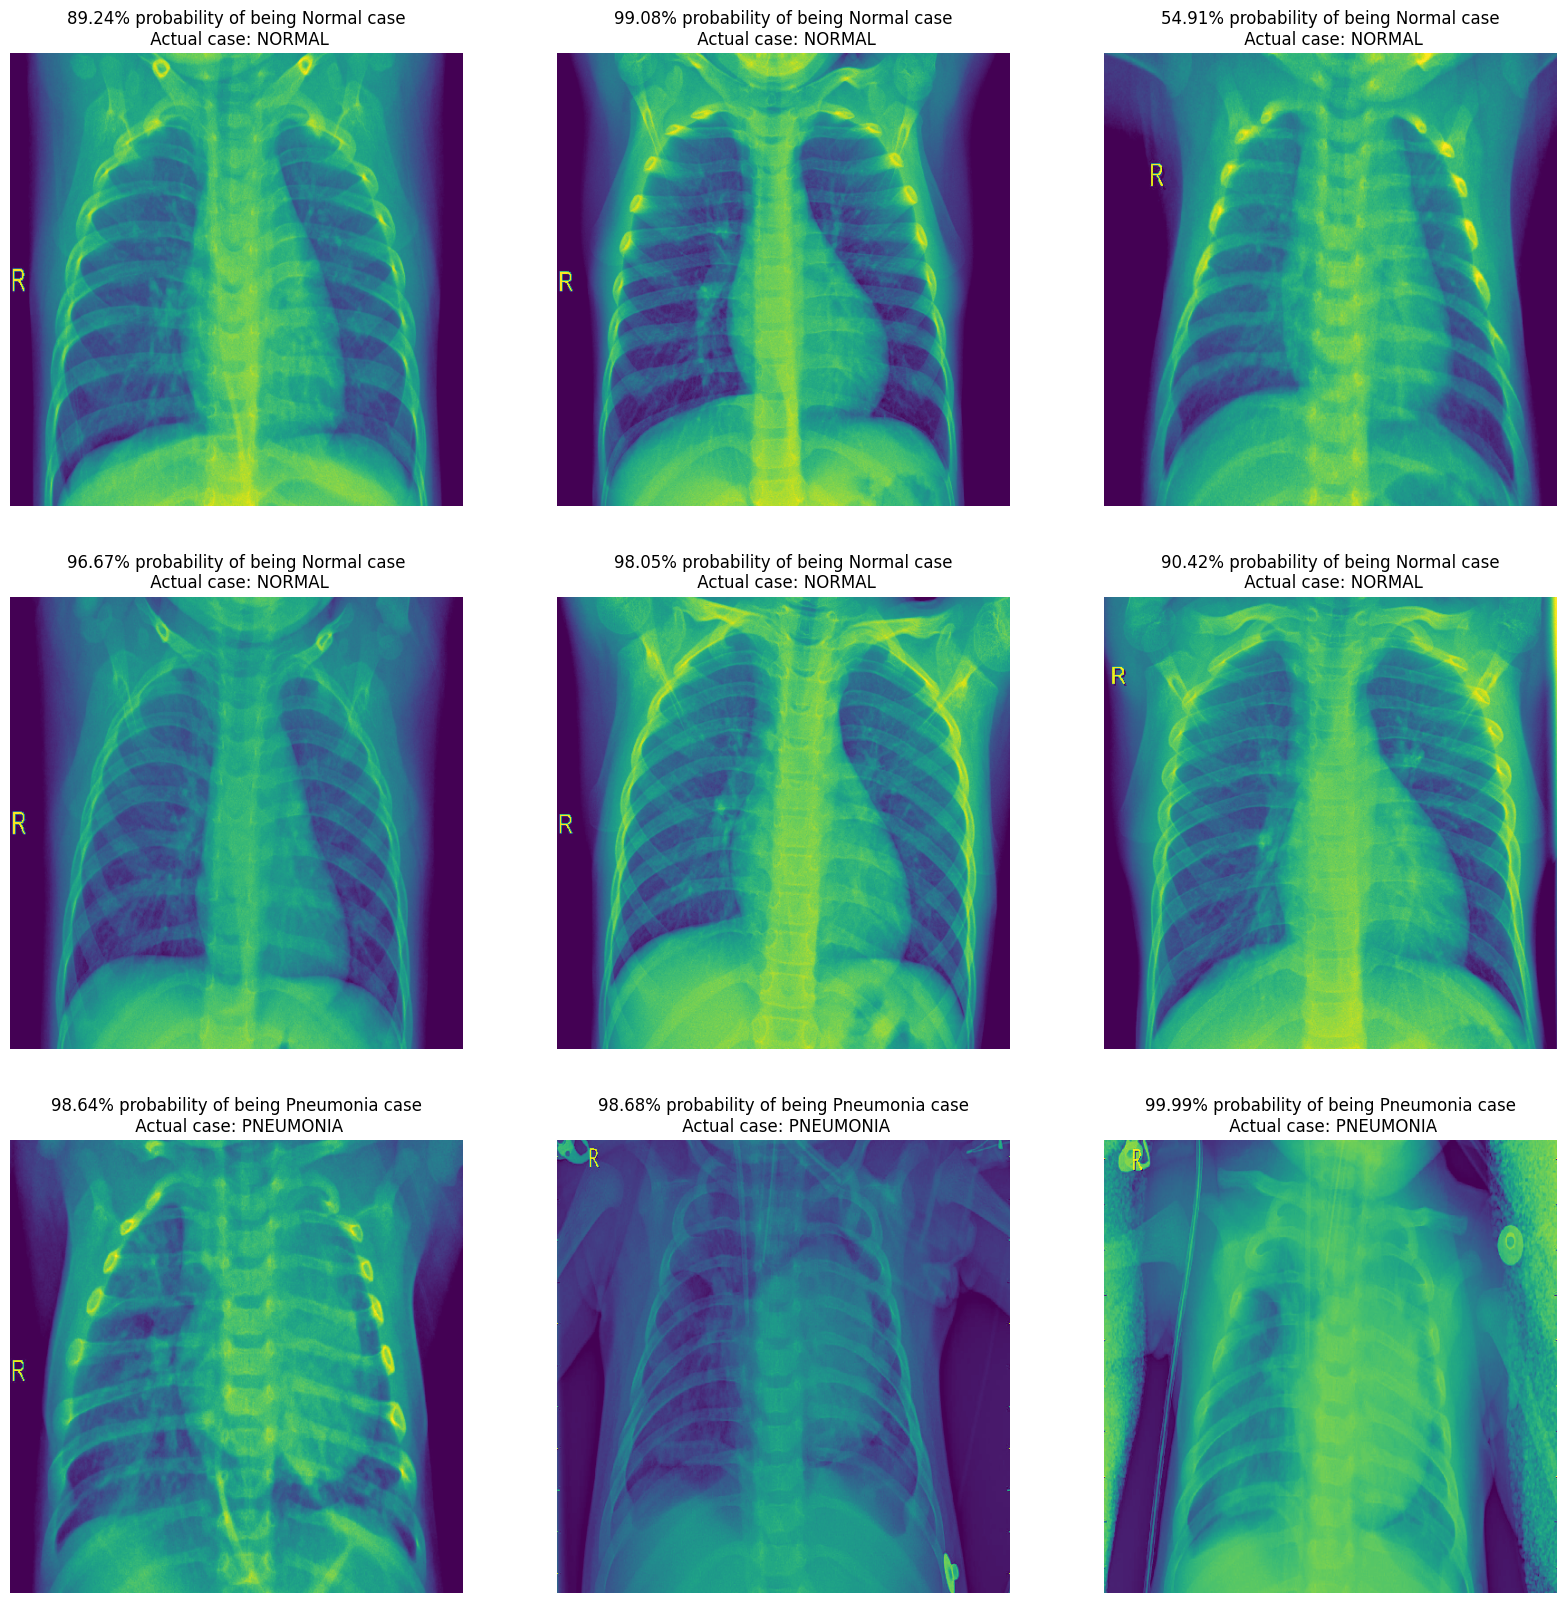

In [13]:
test.reset()
print(test)
x = np.concatenate([test[i][0] for i in range(len(test))])
y = np.concatenate([test[i][1] for i in range(len(test))])

dic = {0: 'NORMAL', 1: 'PNEUMONIA'}

plt.figure(figsize=(20, 20))


for i in range(0 + 228, 9 + 228):
    plt.subplot(3, 3, (i - 228) + 1)

    if preds[i, 0] >= 0.5:
        out = ('{:.2%} probability of being Pneumonia case'.format(preds[i][0]))
    else:
        out = ('{:.2%} probability of being Normal case'.format(1 - preds[i][0]))

    actual_label = dic.get(np.argmax(y[i])) if y[i].ndim > 1 else dic.get(y[i])

    plt.title(out + "\n Actual case: " + actual_label)

    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


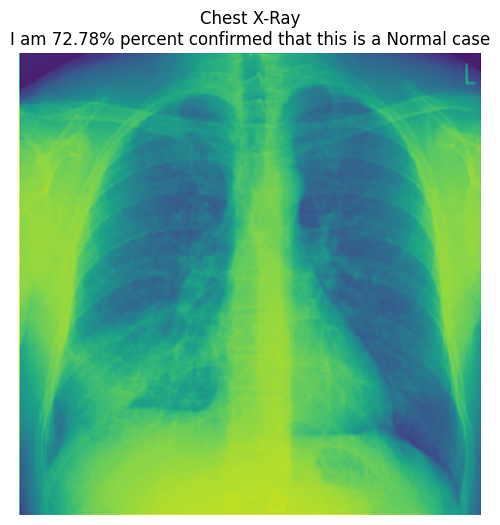

In [14]:
h_path = '/content/drive/MyDrive/dataset/image.jpeg'
from tensorflow.keras.preprocessing import image
h_img = image.load_img(h_path, target_size=(500, 500), color_mode='grayscale')
# Preprocessing the image
pp_h_img = image.img_to_array(h_img)
pp_h_img = pp_h_img/255
pp_h_img = np.expand_dims(pp_h_img, axis=0)
#predict
h_preds= cnn.predict(pp_h_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if h_preds>= 0.5:
  out = ('I am {:.2%} percent confirmed that this is a Pneumonia case'.format(h_preds[0][0]))
else:
  out = ('I am {:.2%} percent confirmed that this is a Normal case'.format(1-h_preds[0][0]))
plt.title("Chest X-Ray\n"+out)
plt.imshow(np.squeeze(pp_h_img))
plt.show()